In [ ]:
# Import libraries
import time
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense

from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import History

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Download and split data into train set and test set
def load_data():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    
    # Data normalization
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # Converts class vectors to binary class matrix.
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    return ((X_train, y_train), (X_test, y_test))

(X_train, y_train), (X_test, y_test) = load_data()

170498071/170498071 [==============================] - 3s 0us/step


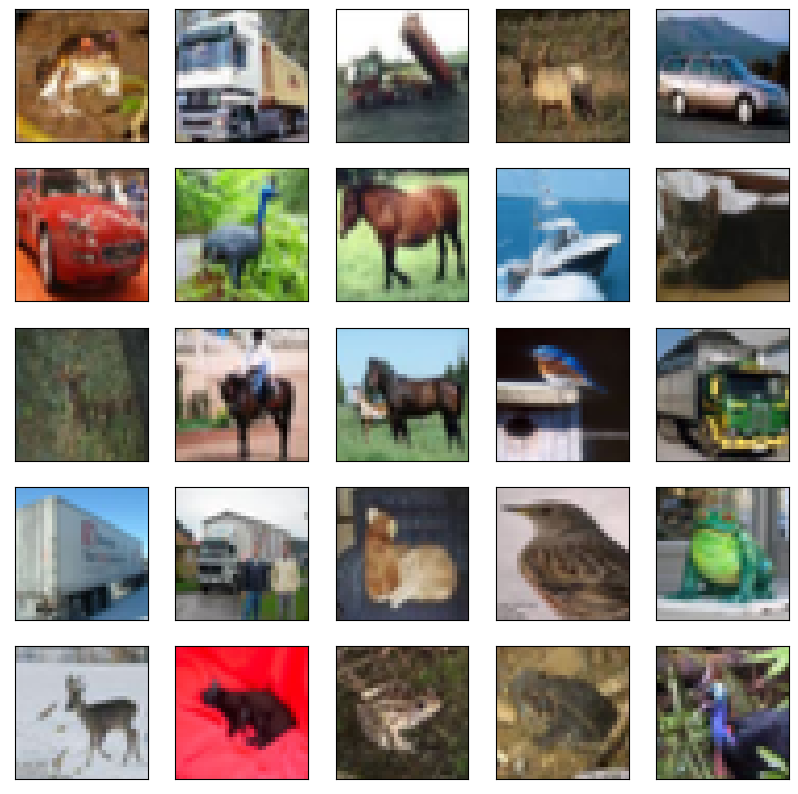

In [3]:
# Visualize images from dataset
def visualize_images():
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=[10,10])
    for i in range (25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.show()
    
visualize_images()

In [4]:
# Define a function to plot the result 
def plot_result(history): 
    fig, axs = plt.subplots(1, 2, figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

In [5]:
# Generate a minimal model that doesn't use any method to optimize
def generate_model():
  return Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

In [6]:
# Generate, compile and fit the model
model = generate_model()
model.summary()
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

history = model.fit(X_train, y_train, epochs=150,  batch_size=64, validation_data=(X_test, y_test), verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

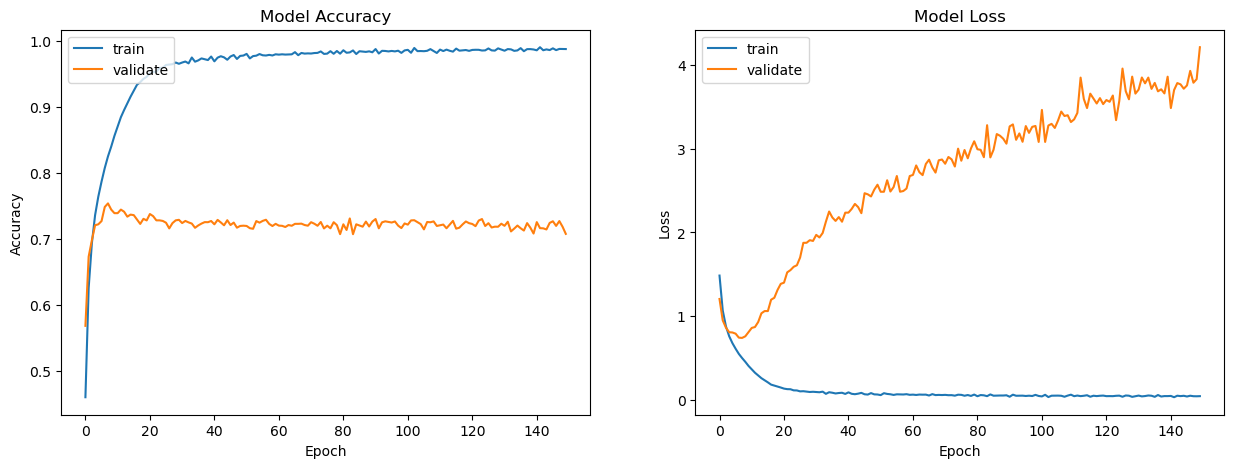

In [7]:
# Plot the result after fitting
plot_result(history)

In [8]:
# Generate a model with Dropout Regularization to reduce overfitting
def generate_model_dropout():
  return Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
  ])

In [9]:
# Generate, compile and fit the model
model_dropout = generate_model_dropout()
model_dropout.summary()
model_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history_dropout = model_dropout.fit(X_train, y_train, epochs=150,  batch_size=64, validation_data=(X_test, y_test), verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

2023-04-29 16:09:25.325107: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


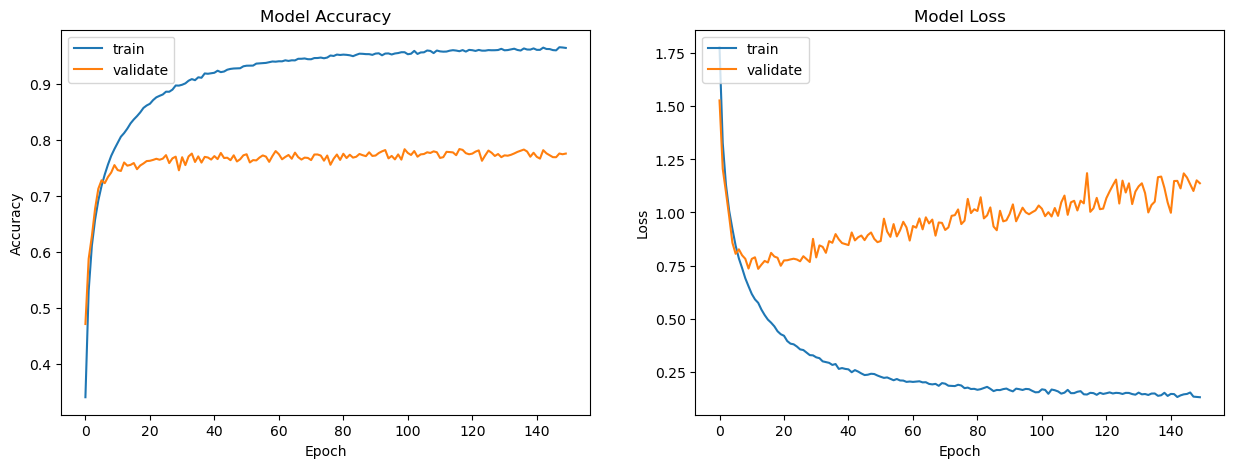

In [10]:
# Plot the result after fitting
plot_result(history_dropout)

## 3. A model applied K-Fold Validation

In [12]:
# Generate a new model from the second model's template
model_kfold = generate_model_dropout()
model_kfold.summary()

model_kfold.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [13]:
# Create k-Fold data and split it
kfold = KFold(n_splits=5, shuffle=True)

# Create a History object to store loss and accuracy
history_kfold = History()
fold_no = 1

for train, test in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    print(f'Training for fold {fold_no}')

    model_kfold.fit(
        X[train], y[train],
        batch_size=64,
        epochs=30,
        validation_data=(X_test, y_test),
        callbacks=[history_kfold],
        verbose=0
    )
    fold_no = fold_no + 1

Training for fold 1


2023-04-29 16:25:52.020567: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Training for fold 2
Training for fold 3
Training for fold 4
Training for fold 5


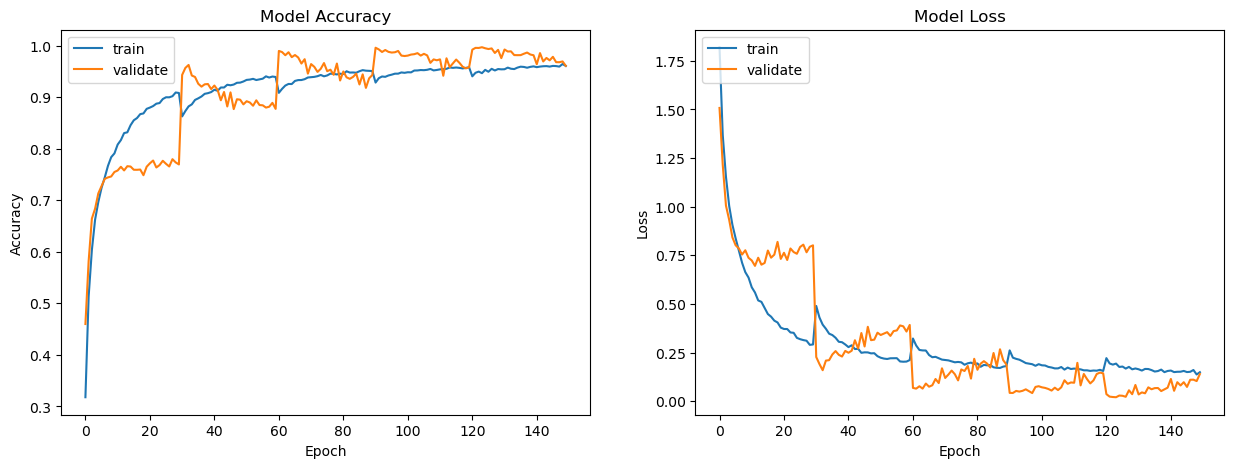

In [14]:
#Plot the result after fitting
plot_result(history_kfold)

In [15]:
# Evaluate how the model has learned
model_predict = np.argmax(model.predict(X_test), axis=-1)
model_dropout_predict = np.argmax(model_dropout.predict(X_test), axis=-1)
model_kfold_predict = np.argmax(model_kfold.predict(X_test), axis=-1)

375/375 [==============================] - 1s 2ms/step


In [16]:
# Minimal model classification report
print(classification_report(np.argmax(y_test, axis=1), model_predict))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1184
           1       0.97      0.98      0.97      1223
           2       0.89      0.93      0.91      1221
           3       0.89      0.90      0.90      1163
           4       0.94      0.93      0.93      1253
           5       0.88      0.94      0.91      1194
           6       0.95      0.95      0.95      1190
           7       0.98      0.94      0.96      1154
           8       0.96      0.97      0.97      1224
           9       0.98      0.93      0.96      1194

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



In [17]:
# Minimal model confusion matrix
print(confusion_matrix(np.argmax(y_test, axis=1), model_predict))

[[1100    2   30   11   13    3    1    2   19    3]
 [   3 1194    1    3    0    3    5    0    4   10]
 [   8    0 1134   21   20   21    8    5    4    0]
 [   4    0   19 1052    8   57   15    5    2    1]
 [   0    0   20   22 1164   25   16    6    0    0]
 [   2    1   16   35    6 1124    4    4    1    1]
 [   0    2   27   19    4    5 1127    1    5    0]
 [   1    0   16   11   13   31    0 1081    0    1]
 [  10    5   11    1    4    3    2    0 1187    1]
 [   9   32    5    5    6    5    4    4   11 1113]]


In [18]:
# Dropout model classification report
print(classification_report(np.argmax(y_test, axis=1), model_dropout_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1184
           1       0.99      0.98      0.99      1223
           2       0.96      0.94      0.95      1221
           3       0.90      0.93      0.91      1163
           4       0.96      0.95      0.96      1253
           5       0.93      0.94      0.93      1194
           6       0.97      0.98      0.97      1190
           7       0.98      0.97      0.97      1154
           8       0.98      0.98      0.98      1224
           9       0.99      0.98      0.98      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



In [19]:
# Dropout model confusion matrix
print(confusion_matrix(np.argmax(y_test, axis=1), model_dropout_predict))

[[1143    2    9   10    2    0    1    2   13    2]
 [   1 1204    0    2    1    1    1    0    3   10]
 [  10    0 1145   19   15   18    8    4    2    0]
 [   5    0   11 1083    6   42   13    1    2    0]
 [   0    0    8   20 1194   11   12    8    0    0]
 [   0    0    5   43    9 1124    5    5    2    1]
 [   2    0    2   13    3    2 1166    1    1    0]
 [   0    0    5   10    7   13    0 1116    0    3]
 [   5    2    4    7    2    2    1    0 1200    1]
 [   1    9    0    3    3    2    0    3    2 1171]]


In [20]:
# K-Fold model classification report
print(classification_report(np.argmax(y_test, axis=1), model_kfold_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1184
           1       1.00      0.97      0.98      1223
           2       0.97      0.95      0.96      1221
           3       0.92      0.93      0.92      1163
           4       0.90      0.99      0.94      1253
           5       0.93      0.95      0.94      1194
           6       0.96      0.99      0.97      1190
           7       0.99      0.94      0.97      1154
           8       0.98      0.99      0.99      1224
           9       0.99      0.96      0.97      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



In [21]:
# K-Fold model confusing matrix
print(confusion_matrix(np.argmax(y_test, axis=1), model_kfold_predict))

[[1134    0   13   10   10    3    2    2   10    0]
 [   1 1182    7    6    1    1    5    0    7   13]
 [   6    0 1157   15   29    6    7    0    1    0]
 [   1    0    1 1076   28   45   12    0    0    0]
 [   0    0    1    3 1238    2    9    0    0    0]
 [   0    0    5   22   21 1134    9    3    0    0]
 [   0    0    4    3    5    3 1173    0    2    0]
 [   0    0    6   12   27   24    0 1085    0    0]
 [   3    0    2    4    2    0    2    0 1211    0]
 [   6    2    2   23    9    0    5    2    2 1143]]


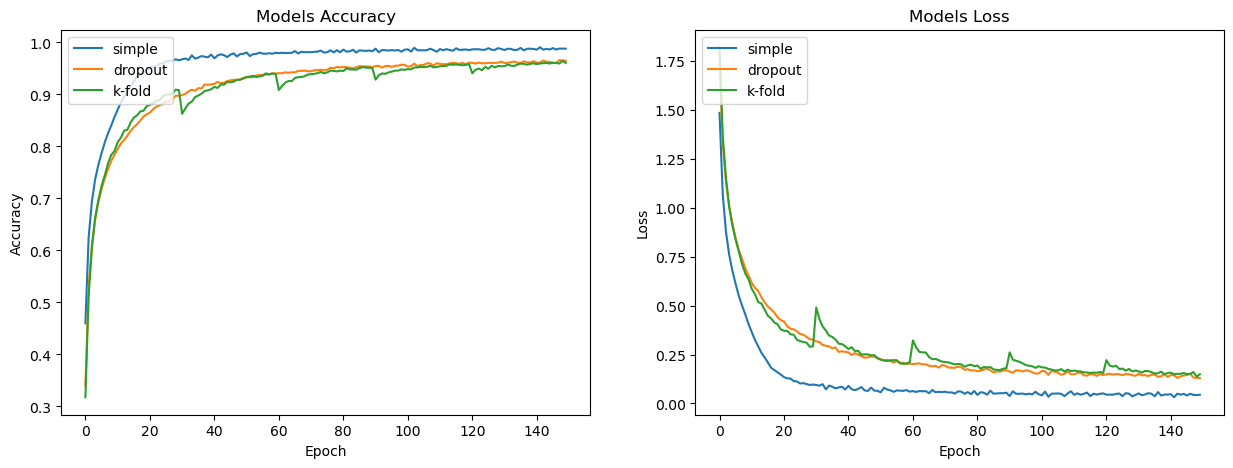

In [22]:
# Compare training result

fig, axs = plt.subplots(1, 2, figsize=(15,5)) 
# summarize history for accuracy
axs[0].plot(history.history['accuracy']) 
axs[0].plot(history_dropout.history['accuracy']) 
axs[0].plot(history_kfold.history['accuracy']) 
axs[0].set_title('Models Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['simple', 'dropout', 'k-fold'], loc='upper left')
# summarize history for loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history_dropout.history['loss']) 
axs[1].plot(history_kfold.history['loss']) 
axs[1].set_title('Models Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['simple', 'dropout', 'k-fold'], loc='upper left')
plt.show()

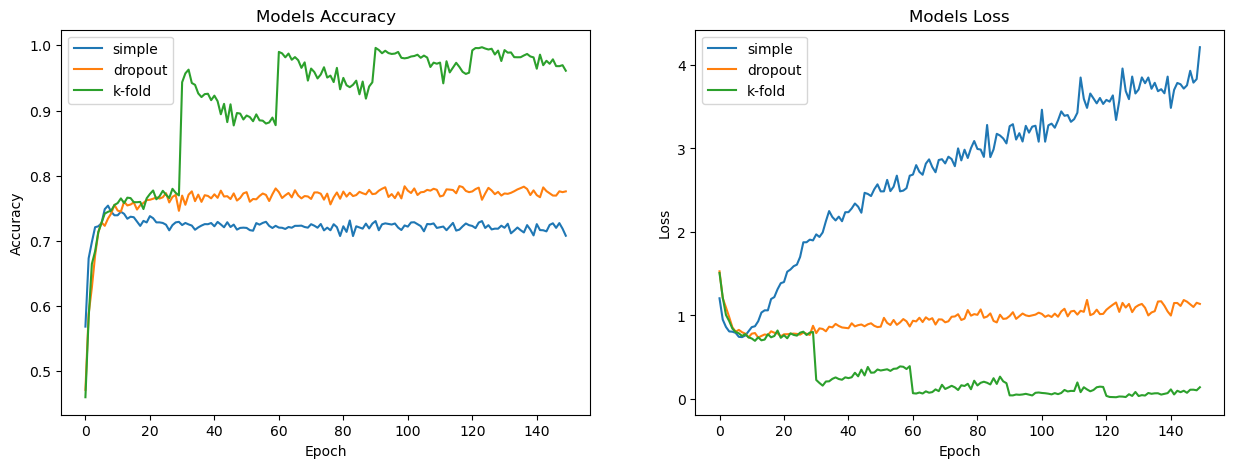

In [23]:
# Compare validating results

fig, axs = plt.subplots(1, 2, figsize=(15,5)) 
# summarize history for accuracy
axs[0].plot(history.history['val_accuracy']) 
axs[0].plot(history_dropout.history['val_accuracy']) 
axs[0].plot(history_kfold.history['val_accuracy']) 
axs[0].set_title('Models Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['simple', 'dropout', 'k-fold'], loc='upper left')
# summarize history for loss
axs[1].plot(history.history['val_loss']) 
axs[1].plot(history_dropout.history['val_loss']) 
axs[1].plot(history_kfold.history['val_loss']) 
axs[1].set_title('Models Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['simple', 'dropout', 'k-fold'], loc='upper left')
plt.show()

## Early Stopping

Early Stopping is to stop the Training of Neural Networks at the Right Time or Stop training when a monitored quantity has stopped improving.

A major concern with training neural networks is in the choice of the number of training epochs to use.

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

In [15]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [16]:
# GENERATE 2D CLASSIFICATION DATASET
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [24]:
# SPLIT INTO TRAIN AND TEST
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [25]:
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)

(30, 2)
(70, 2)
(30,)
(70,)


In [27]:
trainX

array([[ 1.36698238, -0.23541584],
       [ 1.76404402, -0.34563288],
       [-0.37868174,  0.41004375],
       [ 1.15113747, -0.13597622],
       [ 2.31168314,  0.32295125],
       [ 0.53866045,  0.73704603],
       [-0.93583639,  1.00686001],
       [ 1.32563024, -0.13540284],
       [ 0.75398022, -0.37261326],
       [ 0.42764536, -0.38163078],
       [ 1.86426147, -0.04447877],
       [-0.83255618,  0.71258899],
       [ 0.22507434,  0.27186939],
       [ 0.21098847,  0.2244366 ],
       [ 0.05359594,  0.20843943],
       [-0.14691002,  0.85157719],
       [-0.75060111,  0.86559773],
       [-0.91043983,  0.56466749],
       [ 1.21265683, -0.6289975 ],
       [ 0.64660318,  0.72011433],
       [ 0.68237381,  0.08692362],
       [ 0.61031853, -0.48706856],
       [ 1.99715631,  0.24389764],
       [ 0.2077874 , -0.42914145],
       [ 0.35027414,  0.74199317],
       [-0.68407286,  0.66774772],
       [ 1.76290471,  0.02997561],
       [-0.13029538,  0.8163553 ],
       [-1.34872432,

In [31]:
trainy

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
# DEFINE MODEL
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# DEFINE MODEL
model_before = Sequential()
model_before.add(Dense(500, input_dim=2, activation='relu'))
model_before.add(Dense(1, activation='sigmoid'))
model_before.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Snape\anaconda3\envs\torch\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
history_before = model_before.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

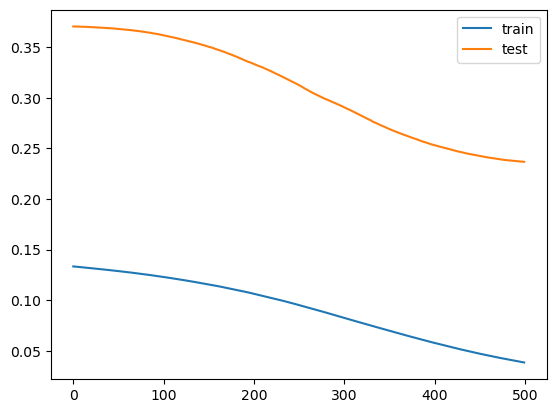

In [44]:
# PLOT TRAINING HISTORY
plt.plot(history_before.history['loss'], label='train')
plt.plot(history_before.history['val_loss'], label='test')
plt.legend()
plt.show()

In [49]:
# PATIENT EARLY STOPPING
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [50]:
# FIT MODEL
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0, callbacks=[es])

Epoch 339: early stopping


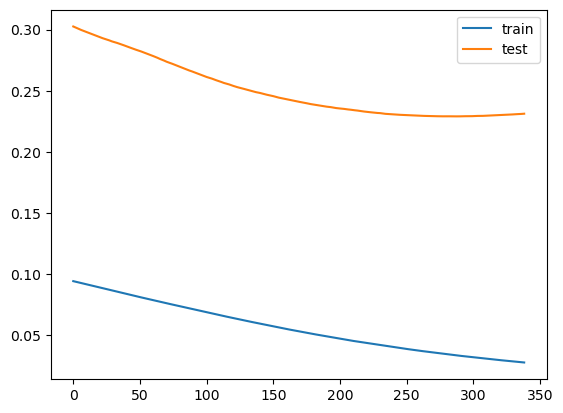

In [51]:
# PLOT TRAINING HISTORY
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

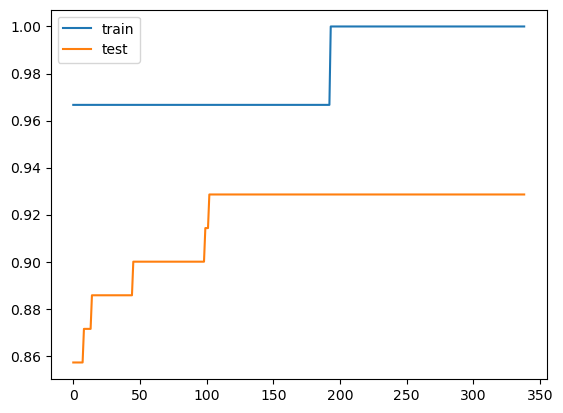

In [52]:
# PLOT TRAINING HISTORY
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## L1, L2 regularization

## Simple Linear Regression

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
import operator
from sklearn.preprocessing import PolynomialFeatures

In [3]:
input_df = pd.read_csv("housing.csv", header=None)
#print(input_df)

data = input_df.values

X = data[0:35, 12] # choose one feature
y = data[0:35, 13] # target

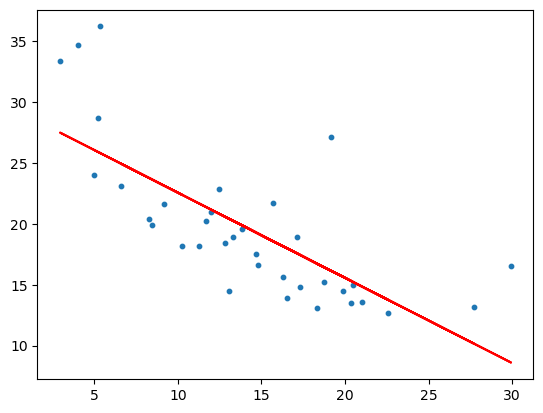

RMSE: 4.109901007971022
R2 score: 0.5397260819538162


In [6]:
# Simple linear regression


lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

lin_reg.fit(X_re, y_re)

y_pred = lin_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

### Polynomial Regression

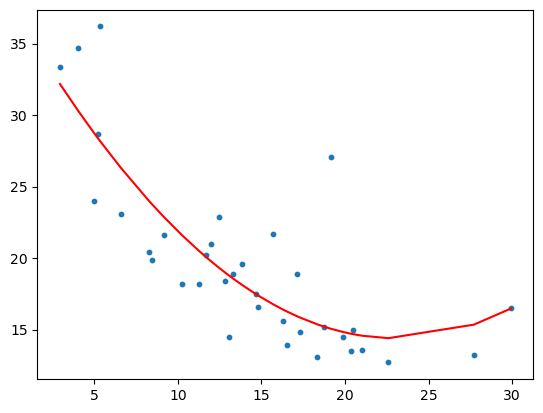

RMSE: 3.7775471605955646
R2 score: 0.6111577631639977


In [8]:
# Polynomial regression


lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_re)

lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data:
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 1. Ridge Regression (Tikhonov Regularization)

During training the model, a regularization term is added to the cost function which keeps the weights as small as possible (thus preventing overfitting). This adapted cost function is called ridge regression cost function, it includes **regularizer penalty**, which is moderated by alpha (or lamda).

Thus, when we fit a model with ridge regression, we minimize the cost function: 
### cost = sum of squared residuals + lamda * (slope)^2


This introduces a small amount of Bias but reduces the Variance significantly and thus reduces the chance of overfitting the training data.

A ridge model with **alpha=0 is equivalent to the simple linear regression model** (see example below).

The **larger the hyperparameter alpha, the closer the weights end up at zero** and the result is a flat line through the data's mean.

This leads to a ridge regression model having smaller weights than without regularization (or same weights when lambda = 1).

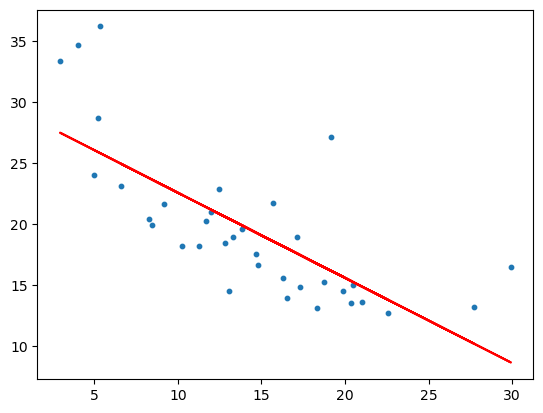

RMSE: 4.1099022048282015
R2 score: 0.5397258138781508


In [9]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=1
ridge_reg = Ridge(alpha=1.0)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

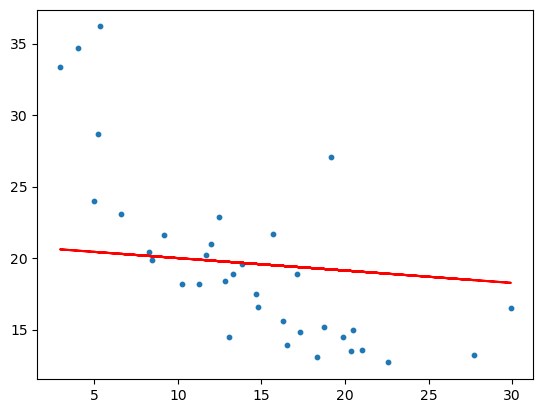

RMSE: 5.664306099570402
R2 score: 0.12572698850601627

Data mean is : 19.63714285714286


In [10]:
# define model with very large alpha
ridge_reg = Ridge(alpha=10000)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

print("\nData mean is : " + str(np.mean(y_re)))

By controlling the model weights, ridge regularization reduces the variance of a model.
Let's try ridge regularization after polynomial transformation with degree=10 versus without regularization.

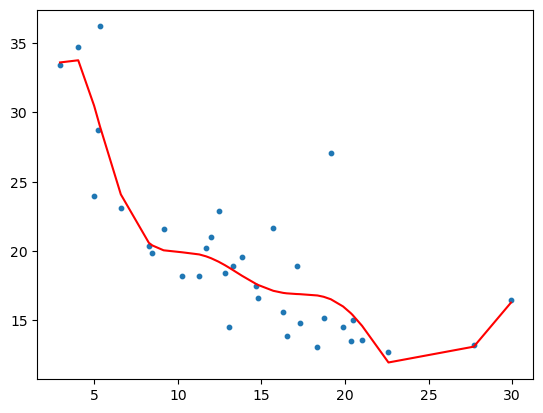

RMSE: 4.00674477872459
R2 score: 0.5625413562835297


In [11]:
# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=10)
X_poly = polynomial_features.fit_transform(X_re)

#----------

# Model without regularization

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))



c:\Users\Snape\anaconda3\envs\torch\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.05472e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


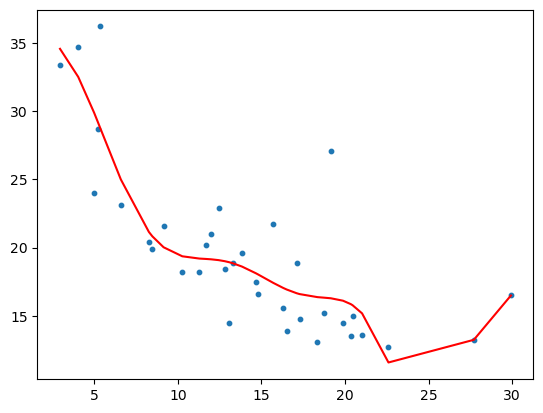

RMSE: 3.9183157683812606
R2 score: 0.5816377340057715


In [12]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=xxx
ridge_reg = Ridge(alpha=10)

# fit ridge model
ridge_reg.fit(X_poly, y_re)

# predict y
y_ridge_poly_pred = ridge_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_ridge_poly_pred), key=sort_axis)
X_re_sort, y_ridge_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_ridge_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_poly_pred))
r2 = r2_score(y_re, y_ridge_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 2. Lasso Regression

**Lasso Regression** stands for **Least Absolute Shrinkage and Selection Operator Regression**. Like Ridge, the model is regularized by adding a regularization term to the cost function, but it uses the L1 norm of the weight vector instead of half the square of the L2 norm.

Lasso regression tends to eliminate the weights of the least important features by setting them to zero. Thus, **Lasso performs feature selection** and outputs a sparse model with only a few nonzero feature weights.

c:\Users\Snape\anaconda3\envs\torch\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.662e+02, tolerance: 1.284e-01
  model = cd_fast.enet_coordinate_descent(


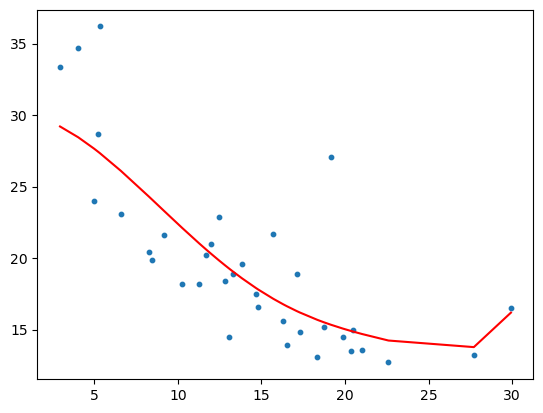

RMSE: 3.6695733053250255
R2 score: 0.6330686840293995


In [13]:
# Polynomial regression as before but using Lasso regularization

from sklearn.linear_model import Lasso

# define model with alpha=10
lasso_reg = Lasso(alpha=10)

# fit ridge model
lasso_reg.fit(X_poly, y_re)

# predict y
y_lasso_poly_pred = lasso_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_lasso_poly_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_lasso_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_lasso_poly_pred))
r2 = r2_score(y_re, y_lasso_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

## When do we use Ridge, when Lasso?
- L1 is more robust against outliers (extreme values) than L2 since L2 squares values
- L2 is more stable than L1 (? resistance to horizontal adjustments ?)
- there is ony one numeric solution for L2 (one diagonal), but many for L1 (many ways to get from A to B in Manhattan)
- L1 is more difficult to compute than L2, since L2 has a closed form solution but L1 can only be solved piece-wise
- L1 leads to more sparsity (elimination of many feature weights) then L2